In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('income.csv')

In [3]:
df.head()

,age,income
0,39,327120
1,32,123253
2,47,832628
3,19,374262
4,46,711231


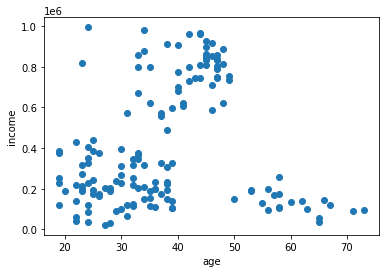

In [4]:
plt.scatter(df['age'],df['income'])
plt.xlabel("age")
plt.ylabel("income")
plt.show()

In [5]:
scaler=MinMaxScaler()
scaler.fit(df[['income']])
df['income']=scaler.transform(df[['income']])
scaler.fit(df[['age']])
df['age']=scaler.transform(df[['age']])

In [6]:
km=KMeans(n_clusters=3)
prediced=km.fit_predict(df[['age','income']])
df['clusters']=prediced

In [7]:
km.cluster_centers_

array([[0.41773504, 0.78120708],
       [0.76296296, 0.11549087],
       [0.18734969, 0.20179422]])

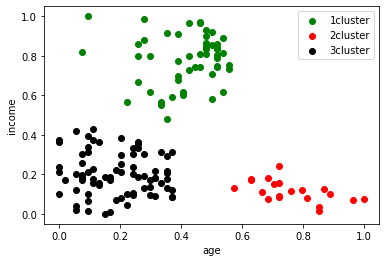

In [9]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]
df3=df[df.clusters==2]
plt.scatter(df1['age'],df1['income'],color='g',label='1cluster')
plt.scatter(df2['age'],df2['income'],color='r',label='2cluster')
plt.scatter(df3['age'],df3['income'],color='black',label='3cluster')
plt.xlabel("age")
plt.ylabel("income")
plt.legend()
plt.show()

In [10]:
sse=[]
k_range=range(1,10)
for k in k_range:
    kmx=KMeans(n_clusters=k)
    kmx.fit_predict(df[['age','income']])
    sse.append(kmx.inertia_)


C:\Users\navod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


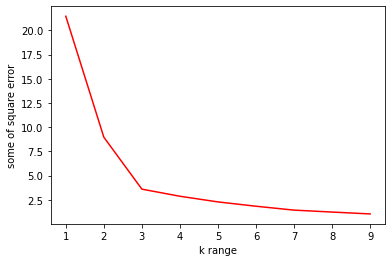

In [11]:
plt.xlabel("k range")
plt.ylabel("some of square error")
plt.plot(k_range,sse,color='r')
plt.show()